<a href="https://colab.research.google.com/github/victoriaporter58/Computational-techniques-for-recognising-handwritten-digits/blob/master/KNN_Parameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbours Parameter Tuning

This notebook takes an in depth look at the most optimal parameters for the MNIST dataset. The final optimisation has been created in the 'Optimised KNN Classifier'.

The KNN algorithm is simple and versatile. It assumes that similar things exist in close proximity. The objective here is to find the parameter set-up that provides the most time efficient and accuracte analysis of the MNIST dataset. To do this, the following parameters are being considered:


*   ***n_neighbours***: The number of neighbours to use.
*   ***weights***: The weight function used in prediction (uniform or distance.)
*   ***algorithm***: The algorithm used to calculate the nearest neighbours (ball_tree, kd_tree or brute.)
*   ***leaf size***: Leaf size passed to BallTree or KDTree.

**Execution Instructions**:
Note that this notebook will take a significant amount of time to execute fully. See 'Optimised_KNN_Classifier.ipynb' for the final optimised implementation.

* Scroll to 'Downgrade Tensorflow' and run that cell only.
* Restart the runtime: Runtime > Restart runtime.
* Finally, execute the whole script: Runtime > Run all.
* Results and visualisations will appear below the respective cells.

**References**:
* Code snippet: https://www.codingame.com/playgrounds/37409/handwritten-digit-recognition-using-scikit-learn
* KNeighbours Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**Created by**: Victoria Porter

In [ ]:
pip freeze > requirements.txt

In [ ]:
cat requirements.txt

##Downgrade Tensorflow
We need to downgrade tensorflow so that we can use it to import the MNIST dataset. Restart the runtime after executing this cell.

In [ ]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 89kB/s 
     |████████████████████████████████| 3.2MB 41.2MB/s 
     |████████████████████████████████| 491kB 46.2MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


##Import the required libraries and the MNIST dataset
We prepare the dataset by splitting it into training images, training labels, testing images and testing labels.

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/server/datasets/MNIST_data/')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/server/datasets/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/server/datasets/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /home/server/datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /home/server/datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as o

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/server/datasets/MNIST_data/')

# set-up dataset as numpy array
# seperate the dataset into training (60,000) images & labels and testing (10,000) images & labels
train_images = np.asarray(mnist.train.images)
train_labels = np.asarray(mnist.train.labels)
test_images = np.asarray(mnist.test.images)
test_labels = np.asarray(mnist.test.labels)

# record the expected results for comparison with predictions
expected = test_labels.tolist()

AttributeError: ignored

##Fine-tune parameters
We want to identify the optimal k value, weights, algorithm and leaf size for the MNIST dataset.

**NOTE**: The cell below is time consuming to execute and is only used to find the optimal parameters. **Skip this cell and execute the next one to train the final model**.

##Find the optimal K value
To find the K value best suited to the MNIST dataset, we are using the brute algorithm because it is the most accurate due to its exhaustive nature.

In [ ]:
# initialise the range of k values we are using i.e. all odd numbers (to prevent ties) between 1 and 30 inclusive
# we want to identify what k value produces the most accurate results before we handle predictions
# accuracies will record the score of each k value i.e. how many predictions the k-nn classifier got correct
kVals = range(1, 30, 2)
accuracies = []

# loop over the k values we have chosen
for k in range(1,30,2):
  # train the classifier using the current k value
  model = KNeighborsClassifier(weights='uniform',n_neighbors=k,algorithm='brute')
  model.fit(train_images, train_labels)

  # check how many predictions the classifer got correct and update the accuracies list
  score = model.score(test_images, expected)
  print("k=%d, accuracy=%.2f%%" % (k, score * 100))
  accuracies.append(score)

# find the value of k that has the highest accuracy - this is the k value that we will use
highest_accuracy_value = int(np.argmax(accuracies))
# print the parameter set-up
print("k=%d achieved highest accuracy of %.2f%% on testing data" % (kVals[highest_accuracy_value], accuracies[highest_accuracy_value] * 100))
print("\n")

train
score
k=1, accuracy=96.77%
train
score
k=3, accuracy=97.00%
train
score
k=5, accuracy=96.79%
train
score
k=7, accuracy=96.79%
train
score
k=9, accuracy=96.62%
train
score
k=11, accuracy=96.56%
train
score
k=13, accuracy=96.41%
train
score
k=15, accuracy=96.28%
train
score
k=17, accuracy=96.33%
train
score
k=19, accuracy=96.25%
train
score
k=21, accuracy=96.18%
train
score
k=23, accuracy=96.03%
train
score
k=25, accuracy=96.00%
train
score
k=27, accuracy=95.89%
train
score
k=29, accuracy=95.82%
k=3 achieved highest accuracy of 97.00% on testing data




##Find the optimal weights function
The weights function is used in prediction.
* **uniform**: uniform weights. All points in each neighborhood are weighted equally.
* **distance**: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [ ]:
model = KNeighborsClassifier(weights='uniform',n_neighbors=3, algorithm='brute')
model.fit(train_images, train_labels)
score = model.score(test_images, expected)
print("weights=uniform, accuracy=%.2f%%" % (score * 100))

model = KNeighborsClassifier(weights='distance',n_neighbors=3, algorithm='brute')
model.fit(train_images, train_labels)
score = model.score(test_images, expected)
print("weights=distance, accuracy=%.2f%%" % (score * 100))


weights=uniform, accuracy=97.00%
weights=distance, accuracy=97.09%


##Find the optimal leaf size
Leaf size only affects the kd_tree and ball_tree algorithms.

In [ ]:
import time

# create function that will calculate the optimal leaf size
def calculate_optimal_leaf_size(algorithm):
  leaf_size_values = range(100,500,100)
  accuracies = []

  for leaf_size in range(100,500,100):
    model = KNeighborsClassifier(weights='distance',n_neighbors=3, algorithm=algorithm)
    
    print('training')
    train_start = time.time()
    model.fit(train_images, train_labels)
    train_end = time.time()
    print('train time: ', train_end-train_start)

    print('scoring')
    test_start = time.time()
    score = model.score(test_images, expected)
    test_end = time.time()
    print('score time: ', test_end-test_start)
    
    print(f"algorithm = {algorithm}, leaf size = {leaf_size}, accuracy=%.2f%%" % (score * 100))
    accuracies.append(score)

  highest_accuracy_value = int(np.argmax(accuracies))
  print(f"algorithm={algorithm}: leaf size=%d achieved highest accuracy of %.2f%% on testing data" % (leaf_size_values[highest_accuracy_value], accuracies[highest_accuracy_value] * 100))
  print("\n")
  print("\n")

# call function for kd tree and ball tree respectively
calculate_optimal_leaf_size('kd_tree')
calculate_optimal_leaf_size('ball_tree')

training
train time:  13.65591311454773
scoring
score time:  930.2599866390228
algorithm = kd_tree, leaf size = 100, accuracy=97.09%
training
train time:  13.681902647018433
scoring
score time:  920.3419725894928
algorithm = kd_tree, leaf size = 200, accuracy=97.09%
training
train time:  13.370009899139404
scoring
score time:  933.3105249404907
algorithm = kd_tree, leaf size = 300, accuracy=97.09%
training
train time:  14.89049243927002
scoring
score time:  940.4742035865784
algorithm = kd_tree, leaf size = 400, accuracy=97.09%
algorithm=kd_tree: leaf size=100 achieved highest accuracy of 97.09% on testing data




training
train time:  12.086901426315308
scoring
score time:  755.3340005874634
algorithm = ball_tree, leaf size = 100, accuracy=97.09%
training
train time:  12.250663042068481
scoring
score time:  753.9172785282135
algorithm = ball_tree, leaf size = 200, accuracy=97.09%
training
train time:  11.91379451751709
scoring
score time:  752.6402878761292
algorithm = ball_tree, lea

##Find the optimal algorithm
Now that we have our parameters optimised, we can go ahead and see which algorithm performs the best.

* **Test 1**: algorithm = brute, weights = distance, n_neighbours = 3
* **Test 2**: algorithm = kd_tree, weights = distance, n_neighbours = 3, leaf_size = 400
* **Test 3**: algorithm = ball_tree, weights = distance, n_neighbours = 3, leaf_size = 300


In [ ]:
# set up model

# Test 1 - 1st fastest
model = KNeighborsClassifier(weights='distance',n_neighbors=3,algorithm='brute')
# train time = 0.573s test time = 36.129s accuracy = 0.9709

#Test 2 - 3rd fastest
#model = KNeighborsClassifier(weights='distance',n_neighbors=3,algorithm='kd_tree', leaf_size=400)
# train time = 13.145s  test time = 755.134s accuracy = 0.9709

#Test 3 - 2nd fastest
#model = KNeighborsClassifier(weights='distance',n_neighbors=3,algorithm='ball_tree', leaf_size=300)
# train time = 11.697s   test time = 725.228s accuracy = 0.9709

In [ ]:
# train the model
model.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

##Predictions
Now that the model has been trained, we want to make predictions on the test data.

In [ ]:
predictions = model.predict(test_images)

##Evaluation
Now that we have predictions, we want to visualise them.
* ***Accuracy***: The accuracy of our classifier.
* ***Classification report***: This shows us how accurate our classifier is at identifying each class.
* ***Confusion matrix***: This shows us exactly how many samples our classifier got correct/incorrect.

In [ ]:
# print a classification report to show how the classifer performed on each digit
print("Accuracy: ", accuracy_score(expected, predictions), "\n")
print("Classification Report:")
print(classification_report(expected, predictions), "\n")
print("Confusion Matrix:")
print(confusion_matrix(expected, predictions))

Accuracy:  0.9709 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 

Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1132    2    0    1    0    0    0    0    0]
 [   9    5  997    2    0    0    1   16    2    0]
 [   0    1    4  9

#Testing
This code allows us to choose an image from the testing dataset and allow our classifier to make a prediction on it.

Prediction:  9


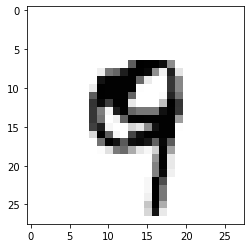

In [ ]:
# select image index from test dataset
image_index = 4444

# reshape the test image so that it fits on screen
# make colourmap greyscale
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')

# make a prediction on the image using the classifier defined and trained above
# (1,-1) means we are using a single sample
pred = model.predict(test_images[image_index].reshape(1,-1))[0]

# print the classifier's prediction
print("Prediction: ",pred)